In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import numpy as np

In [2]:
os.chdir("/Users/luqingqi/Desktop/esport")

In [3]:
team = pd.read_csv("highest_earning_teams.csv")

In [4]:
player = pd.read_csv("highest_earning_players.csv")

In [5]:
country = pd.read_csv("country-and-continent-codes-list.csv")

In [56]:
team.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [9]:
player.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [20]:
player.drop(player.columns[[0]], axis = 1, inplace = True)

In [21]:
player.shape

(1000, 7)

In [22]:
player.size

7000

In [23]:
player.dtypes

NameFirst         object
NameLast          object
CurrentHandle     object
CountryCode       object
TotalUSDPrize    float64
Game              object
Genre             object
dtype: object

In [24]:
player.describe()

,TotalUSDPrize
count,1.000000e+03
mean,3.977932e+05
std,6.908492e+05
min,2.417167e+04
25%,8.378962e+04
50%,1.683284e+05
75%,3.937352e+05
max,6.952597e+06


In [25]:
player.mean()

TotalUSDPrize    397793.21641
dtype: float64

In [30]:
player['Genre'].value_counts()

Multiplayer Online Battle Arena    400
First-Person Shooter               200
Battle Royale                      200
Strategy                           100
Collectible Card Game              100
Name: Genre, dtype: int64

In [14]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [16]:
player.groupby('Game')['TotalUSDPrize'].sum().sort_values(ascending = False)

Game
Dota 2                             179178818.95000
Counter-Strike: Global Offensive    56541920.90000
Fortnite                            43409370.91000
League of Legends                   35043475.87000
Starcraft II                        25379823.93000
Hearthstone                         13335640.79000
PUBG                                12441958.89000
Overwatch                           12347808.50000
Heroes of the Storm                 11780445.24000
Arena of Valor                       8333952.43000
Name: TotalUSDPrize, dtype: float64

In [18]:
player.groupby('Genre')['TotalUSDPrize'].sum().sort_values(ascending = False)

Genre
Multiplayer Online Battle Arena   234336692.49000
First-Person Shooter               68889729.40000
Battle Royale                      55851329.80000
Strategy                           25379823.93000
Collectible Card Game              13335640.79000
Name: TotalUSDPrize, dtype: float64

In [62]:
pd.pivot_table(player,index=["CountryCode"],values=["TotalUSDPrize"],
              aggfunc=[np.sum])

,sum
,TotalUSDPrize
CountryCode,
ar,1174159.24
at,2742223.11
au,7999674.76
ba,762802.56
be,1230174.53
bg,5741392.45
br,5777552.00
by,779629.42


In [19]:
pd.pivot_table(player,index=["Game","Genre"],values=["TotalUSDPrize"],
              aggfunc=[np.sum])

,,sum
,,TotalUSDPrize
Game,Genre,
Arena of Valor,Multiplayer Online Battle Arena,8333952.43000
Counter-Strike: Global Offensive,First-Person Shooter,56541920.90000
Dota 2,Multiplayer Online Battle Arena,179178818.95000
Fortnite,Battle Royale,43409370.91000
Hearthstone,Collectible Card Game,13335640.79000
Heroes of the Storm,Multiplayer Online Battle Arena,11780445.24000
League of Legends,Multiplayer Online Battle Arena,35043475.87000
Overwatch,First-Person Shooter,12347808.50000


([<matplotlib.patches.Wedge at 0x7fa850328df0>,
 [Text(-0.4993895680663527, 0.9801071672559598, 'Multiplayer Online Battle Arena'),
  Text(-0.7778174228929385, -0.7778174957174645, 'First-Person Shooter'),
  Text(0.4993896139484799, -0.9801071438778459, 'Battle Royale'),
  Text(1.0864571883490806, -0.17207782508101055, 'Strategy'),
  Text(0.9801071321887882, 0.49938963688954285, 'Collectible Card Game')],
 [Text(-0.2723943098543742, 0.5346039094123416, '40.00000%'),
  Text(-0.4242640488506937, -0.4242640885731624, '20.00000%'),
  Text(0.272394334880989, -0.5346038966606431, '20.00000%'),
  Text(0.5926130118267711, -0.09386063186236938, '10.00000%'),
  Text(0.5346038902847935, 0.2723943473942961, '10.00000%')])

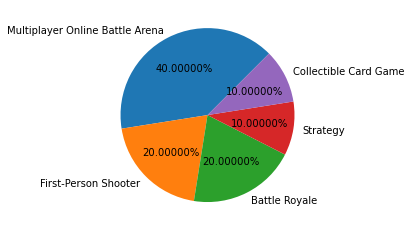

In [54]:
fig1, ax1 = plt.subplots()

x = list(player['Genre'].value_counts().index)
y = list(player['Genre'].value_counts())

ax1.pie(y, labels =x, autopct='%1.5f%%', startangle=45)

([<matplotlib.patches.Wedge at 0x7fa8503eb970>,
 [Text(-0.003455701743252077, 1.099994571861817, 'kr'),
  Text(-1.0654414531658056, 0.27355896964993964, 'cn'),
  Text(-0.8858387361950296, -0.652142418077825, 'us'),
  Text(-0.465228145639162, -0.9967761897763945, 'se'),
  Text(-0.195926908066742, -1.0824105721469126, 'ca'),
  Text(0.05871977193549108, -1.0984316038715582, 'fr'),
  Text(0.3068901296110616, -1.0563230795297933, 'dk'),
  Text(0.5299289629941, -0.9639373912137645, 'tw'),
  Text(0.7117614925126018, -0.8386868174570491, 'de'),
  Text(0.8541351067814121, -0.6931473287573904, 'th'),
  Text(0.9537777244369126, -0.5480036974035348, 'ru'),
  Text(1.0122549961684497, -0.43051111801208103, 'gb'),
  Text(1.050350973508607, -0.3267458223903125, 'fi'),
  Text(1.076438977786077, -0.22644895032405432, 'pl'),
  Text(1.0913261613454137, -0.13786663687449535, 'ua'),
  Text(1.098241700541801, -0.06217046880193982, 'nl'),
  Text(1.0999782874603965, 0.006911375817713328, 'br'),
  Text(1.097373

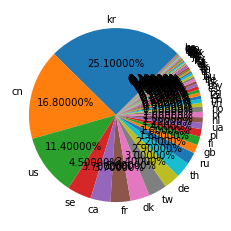

In [61]:
fig1, ax1 = plt.subplots()

x = list(player['CountryCode'].value_counts().index)
y = list(player['CountryCode'].value_counts())

ax1.pie(y, labels =x, autopct='%1.5f%%', startangle=45)

In [20]:
player[['Game','Genre','TotalUSDPrize','NameFirst','NameLast']].sort_values(by='TotalUSDPrize', ascending=False).head(20).reset_index(drop=True)

,Game,Genre,TotalUSDPrize,NameFirst,NameLast
0,Dota 2,Multiplayer Online Battle Arena,6952596.58000,Johan,Sundstein
1,Dota 2,Multiplayer Online Battle Arena,6470000.02000,Jesse,Vainikka
2,Dota 2,Multiplayer Online Battle Arena,6000411.96000,Anathan,Pham
3,Dota 2,Multiplayer Online Battle Arena,5554297.41000,Sébastien,Debs
4,Dota 2,Multiplayer Online Battle Arena,5470902.57000,Topias,Taavitsainen
5,Dota 2,Multiplayer Online Battle Arena,5193382.81000,Kuro,Takhasomi
6,Dota 2,Multiplayer Online Battle Arena,4798043.68000,Amer,Al-Barkawi
7,Dota 2,Multiplayer Online Battle Arena,4579118.16000,Ivan,Ivanov
8,Dota 2,Multiplayer Online Battle Arena,4193412.69000,Maroun,Merhej
9,Dota 2,Multiplayer Online Battle Arena,3765369.04000,Lasse,Urpalainen


<AxesSubplot:title={'center':'Total prizes for games'}, xlabel='CountryCode', ylabel='TotalUSDPrize'>

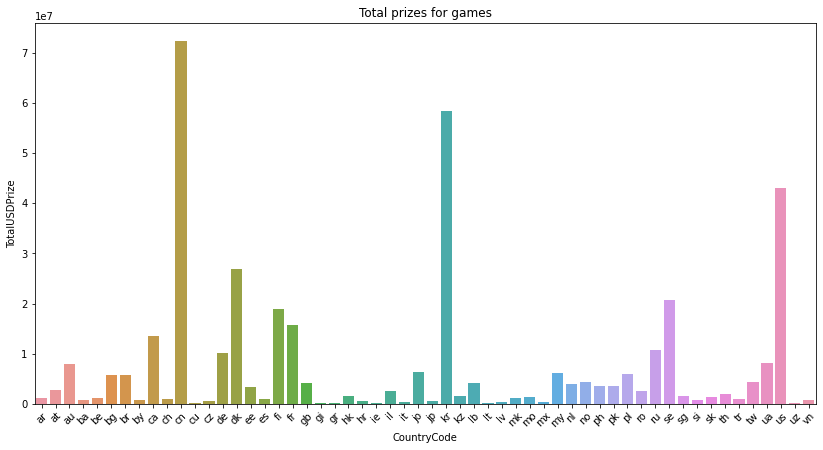

In [66]:
games_prizes = player.groupby(['CountryCode']).TotalUSDPrize.agg(sum)
games_prizes = pd.DataFrame(games_prizes)
plt.figure(figsize=(14,7))
plot_1 = sns.barplot(data=games_prizes, y=games_prizes.TotalUSDPrize, x=games_prizes.index )
plt.setp(plot_1.get_xticklabels(), rotation=45)
plt.title('Total prizes for games')
plot_1

<AxesSubplot:title={'center':'Total prizes for games'}, xlabel='Game', ylabel='TotalUSDPrize'>

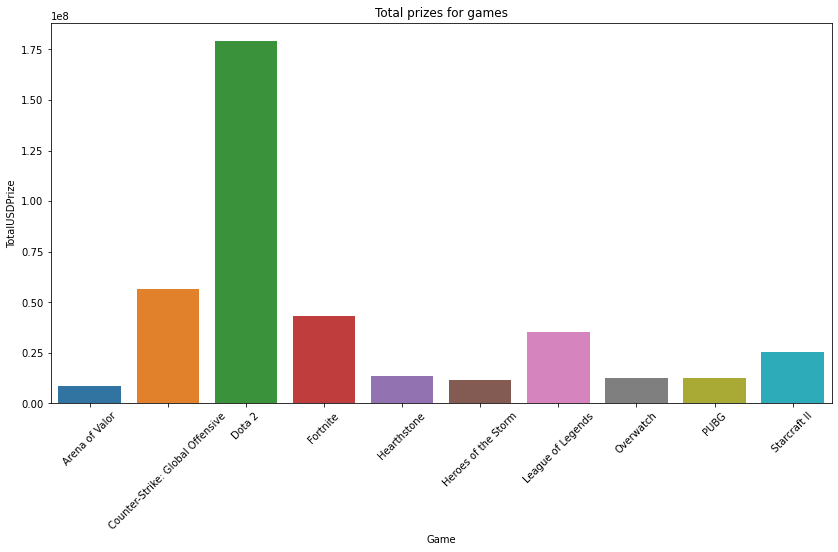

In [71]:
games_prizes = player.groupby(['Game']).TotalUSDPrize.agg(sum)
games_prizes = pd.DataFrame(games_prizes)
plt.figure(figsize=(14,7))
plot_1 = sns.barplot(data=games_prizes, y=games_prizes.TotalUSDPrize, x=games_prizes.index )
plt.setp(plot_1.get_xticklabels(), rotation=45)
plt.title('Total prizes for games')
plot_1

<AxesSubplot:title={'center':'Total prizes for games'}, xlabel='Genre', ylabel='TotalUSDPrize'>

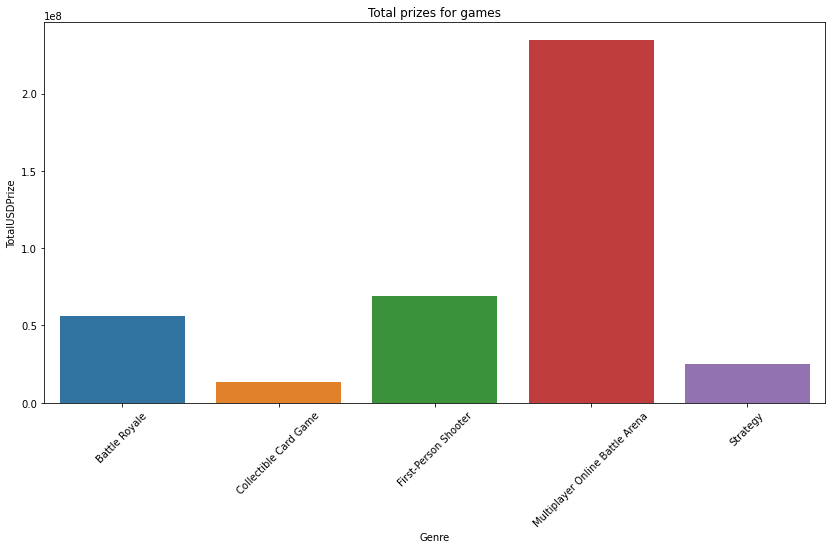

In [72]:
games_prizes = player.groupby(['Genre']).TotalUSDPrize.agg(sum)
games_prizes = pd.DataFrame(games_prizes)
plt.figure(figsize=(14,7))
plot_1 = sns.barplot(data=games_prizes, y=games_prizes.TotalUSDPrize, x=games_prizes.index )
plt.setp(plot_1.get_xticklabels(), rotation=45)
plt.title('Total prizes for games')
plot_1

In [79]:
table = pd.pivot_table(team,index=["Game","Genre","TeamName"],values=["TotalUSDPrize"],
               aggfunc=[np.sum],fill_value=0,margins=True)
table

sum
                                                                      TotalUSDPrize
Game           Genre                           TeamName                            
Arena of Valor Multiplayer Online Battle Arena Actoz Stars             2.225000e+04
                                               Alliance                4.000000e+03
                                               American National Team  3.450000e+04
                                               Bazaar Gaming           3.003253e+05
                                               British National Team   2.500000e+03
...                                                                             ...
Starcraft II   Strategy                        compLexity Gaming       1.239406e+05
                                               mTw                     7.538900e+04
                                               mYinsanity              4.599953e+05
                                               mousesports             5.429018e+05
All                                                                    5.010442e+08

[929 rows x 1 columns]

In [82]:
LOL = table.query('Game == ["League of Legends"]')

In [83]:
LOL

sum
                                                                    TotalUSDPrize
Game              Genre                           TeamName                       
League of Legends Multiplayer Online Battle Arena 100 Thieves           237475.00
                                                  AZUBU                 399501.38
                                                  Afreeca Freecs        494452.56
                                                  Albus NoX Luna        238702.50
                                                  Alliance              115000.00
...                                                                           ...
                                                  Young Miracles        193302.00
                                                  ahq e-Sports Club     840606.45
                                                  eSuba                 237472.51
                                                  mousesports           267924.75
                                                  paiN Gaming           207841.84

[100 rows x 1 columns]